In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imagecodecs

     |████████████████████████████████| 31.0 MB 61.8 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.util import random_noise
from skimage.filters import sobel, prewitt
from skimage.morphology import binary_dilation
from scipy import fft

In [ ]:
eight = imread('/content/drive/MyDrive/eight.tif', as_gray=True)
eightWithNoise1 = random_noise(eight, mode='gaussian', var=0.05) 
eightWithNoise2 = random_noise(eight, mode='gaussian', var=0.1) 

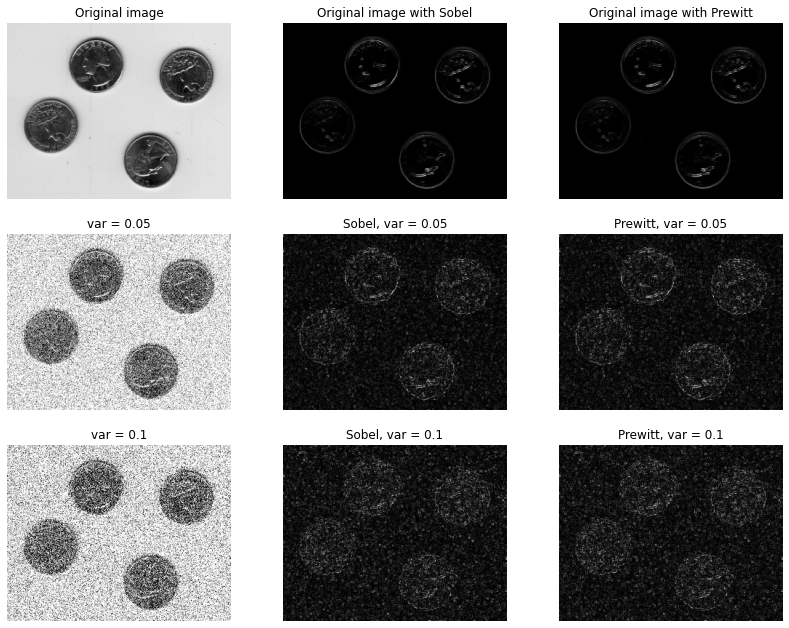

In [ ]:
def sobel_filter(img):
    eightSobelX = sobel(img, axis=1) 
    eightSobelY = sobel(img, axis=0)
    squaredGradientSobel = eightSobelX**2 + eightSobelY**2
    return squaredGradientSobel

def prewitt_filter(img):
    eightPrewittX = prewitt(img, axis=1) 
    eightPrewittY = prewitt(img, axis=0)
    squaredGradientPrewitt = eightPrewittX**2 + eightPrewittY**2
    return squaredGradientPrewitt

fig, axs = plt.subplots(3, 3, figsize=(14,11))

axs[0, 0].imshow(eight, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original image')
axs[0, 1].imshow(sobel_filter(eight), cmap="gray")
axs[0, 1].axis('off')
axs[0, 1].set_title('Original image with Sobel')
axs[0, 2].imshow(prewitt_filter(eight), cmap='gray')
axs[0, 2].axis('off')
axs[0, 2].set_title('Original image with Prewitt')

axs[1, 0].imshow(eightWithNoise1, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('var = 0.05')
axs[1, 1].imshow(sobel_filter(eightWithNoise1), cmap="gray")
axs[1, 1].axis('off')
axs[1, 1].set_title('Sobel, var = 0.05')
axs[1, 2].imshow(prewitt_filter(eightWithNoise1), cmap='gray')
axs[1, 2].axis('off')
axs[1, 2].set_title('Prewitt, var = 0.05')

axs[2, 0].imshow(eightWithNoise2, cmap='gray')
axs[2, 0].axis('off')
axs[2, 0].set_title('var = 0.1')
axs[2, 1].imshow(sobel_filter(eightWithNoise2), cmap="gray")
axs[2, 1].axis('off')
axs[2, 1].set_title('Sobel, var = 0.1')
axs[2, 2].imshow(prewitt_filter(eightWithNoise2), cmap='gray')
axs[2, 2].axis('off')
axs[2, 2].set_title('Prewitt, var = 0.1')

plt.show()

Text(0.5, 1.0, 'movie_flicker2 after correction')

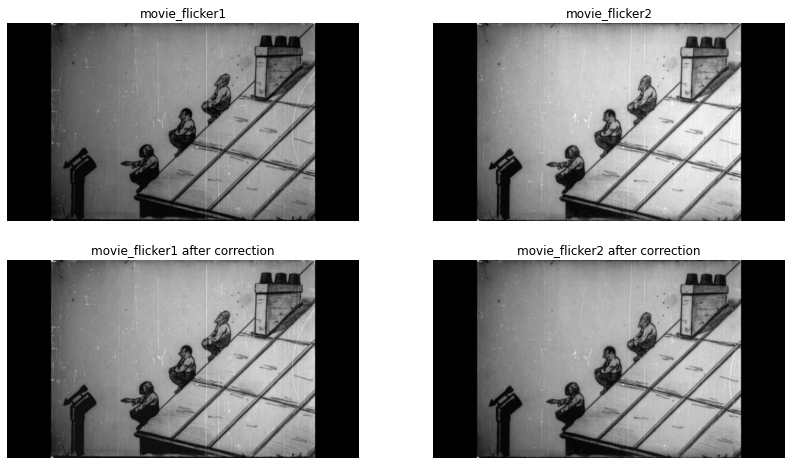

In [ ]:
def inverse_cdf(l, cdf):
  subset  = np.take(range(256), np.where(cdf >= l))
  return np.min(subset)
def CDF_map(intensity, CDF):
    return CDF[intensity]

def Image_to_CDFimage(img, CDF):
    CDFimage = CDF_map(img, CDF) 
    return CDFimage
def cumulative_histogram(hist):
  cumsum_hist = np.cumsum(hist)/np.sum(hist)
  return cumsum_hist

def histogram_matching(X_image, original_img, target_img):  
  orignal_hist, _ = np.histogram(original_img.ravel(),256,[0,256])
  target_hist, _ = np.histogram(target_img.ravel(),256,[0,256])
  X_hist, _ = np.histogram(X_image.ravel(),256,[0,256])

  original_CDF = cumulative_histogram(orignal_hist)
  target_CDF = cumulative_histogram(target_hist)
  X_CDF = cumulative_histogram(X_hist)

  X_CDFimg = Image_to_CDFimage(X_image, X_CDF)

  (X,Y) = X_image.shape
  output_img = np.zeros((X,Y))
  for x in range(0,X):
    for y in range(0,Y):
      output_img[x,y] = (inverse_cdf(X_CDFimg[x,y], target_CDF)+inverse_cdf(X_CDFimg[x,y], original_CDF))/2
  return output_img  

movie_flicker1 = imread('/content/drive/MyDrive/movie_flicker1.tif', as_gray=True)
movie_flicker1 *= 255
movie_flicker2 = imread('/content/drive/MyDrive/movie_flicker2.tif', as_gray=True)
movie_flicker2 *= 255

flicker1_hist, _ = np.histogram(movie_flicker1.ravel(), 256, [0,256])
flicker2_hist, _ = np.histogram(movie_flicker2.ravel(), 256, [0,256])
flicker1_CDF = cumulative_histogram(flicker1_hist)
flicker2_CDF = cumulative_histogram(flicker2_hist)

fig, axs = plt.subplots(2, 2, figsize=(14,8))
axs[0, 0].imshow(movie_flicker1, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('movie_flicker1')
axs[0, 1].imshow(movie_flicker2, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('movie_flicker2')

movie1 = histogram_matching(movie_flicker1.astype(int), movie_flicker1.astype(int), movie_flicker2.astype(int))
movie2 = histogram_matching(movie_flicker2.astype(int), movie_flicker1.astype(int), movie_flicker2.astype(int))

movie1_hist, _ = np.histogram(movie1.ravel(), 256, [0,256])
movie2_hist, _ = np.histogram(movie2.ravel(), 256, [0,256])
movie1_CDF = cumulative_histogram(movie1_hist)
movie2_CDF = cumulative_histogram(movie2_hist)

axs[1, 0].imshow(movie1, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('movie_flicker1 after correction')
axs[1, 1].imshow(movie2, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('movie_flicker2 after correction')

Text(0.5, 1.0, 'movie2_CDF')

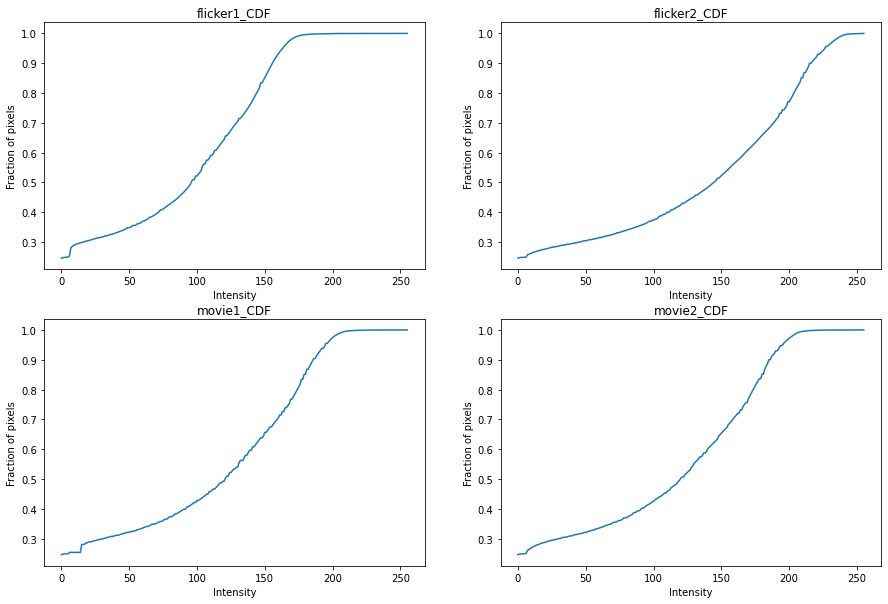

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(flicker1_CDF)
axs[0, 0].set_xlabel('Intensity')
axs[0, 0].set_ylabel('Fraction of pixels')
axs[0, 0].set_title('flicker1_CDF')
axs[0, 1].plot(flicker2_CDF)
axs[0, 1].set_xlabel('Intensity')
axs[0, 1].set_ylabel('Fraction of pixels')
axs[0, 1].set_title('flicker2_CDF')
axs[1, 0].plot(movie1_CDF)
axs[1, 0].set_xlabel('Intensity')
axs[1, 0].set_ylabel('Fraction of pixels')
axs[1, 0].set_title('movie1_CDF')
axs[1, 1].plot(movie2_CDF)
axs[1, 1].set_xlabel('Intensity')
axs[1, 1].set_ylabel('Fraction of pixels')
axs[1, 1].set_title('movie2_CDF')

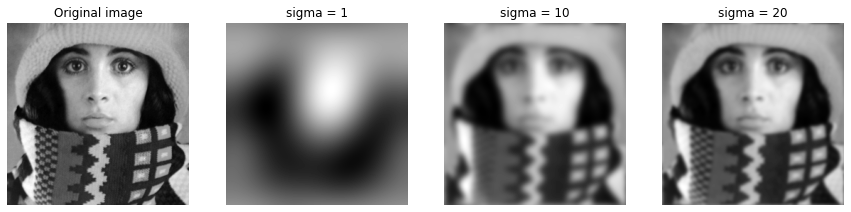

In [ ]:
def gaussian_kernel(image,sigma):
    x, y = image.shape
    X = np.linspace(-(x - 1) / 2., (x - 1) / 2., x)
    Y = np.linspace(-(y - 1) / 2., (y - 1) / 2., y)
    gauss_x = np.exp(-0.5 * np.square(X) / np.square(sigma))
    gauss_y = np.exp(-0.5 * np.square(Y) / np.square(sigma))
    kernel = np.outer(gauss_x, gauss_y)
    return kernel / np.sum(kernel)

def scale_fft(img, sigma):
    fft_img = fft.fftshift(fft.fft2(img))
    fft_kernel = gaussian_kernel(img,sigma)
    fft_new_img = fft_img * fft_kernel
    new_img = fft.ifft2(fft.ifftshift(fft_new_img))
    return new_img

trui = imread('/content/drive/MyDrive/trui.png', as_gray=True)
new_img1 = scale_fft(trui, 1)
new_img2 = scale_fft(trui, 10)
new_img3 = scale_fft(trui, 20)

fig, axs = plt.subplots(1, 4, figsize=(15,10))
axs[0].imshow(trui, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original image')
axs[1].imshow(abs(new_img1), cmap='gray')
axs[1].axis('off')
axs[1].set_title('sigma = 1')
axs[2].imshow(abs(new_img2), cmap='gray')
axs[2].axis('off')
axs[2].set_title('sigma = 10')
axs[3].imshow(abs(new_img3), cmap='gray')
axs[3].axis('off')
axs[3].set_title('sigma = 20')
plt.show()

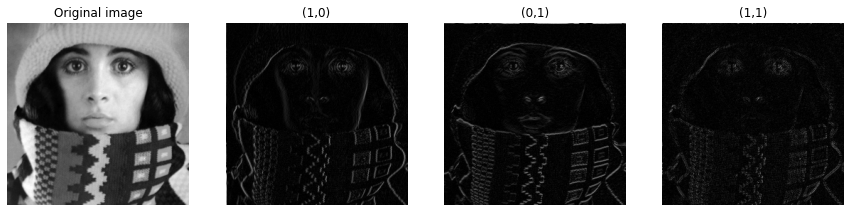

In [ ]:
def convolution_fft(image, kernel):
    fft_image = fft.fft2(image)
    fft_kernel = fft.fft2(kernel, image.shape)
    fft_new_image = fft_image * fft_kernel
    new_image = fft.ifft2(fft_new_image, image.shape)
    return new_image

def image_derivative(image, x, y):
    kernel_x = [[1, -1]]
    kernel_y = [[1], [-1]]
    derivative = image
    for i in range(x):
      derivative = convolution_fft(derivative, kernel_x)
    for i in range(y):
      derivative = convolution_fft(derivative, kernel_y)
    return derivative

result_1 = image_derivative(trui, 1, 0)
result_2 = image_derivative(trui, 0, 1)
result_3 = image_derivative(trui, 1, 1)

fig, axs = plt.subplots(1, 4, figsize=(15,10))
axs[0].imshow(trui, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original image')
axs[1].imshow(abs(result_1), cmap='gray')
axs[1].axis('off')
axs[1].set_title('(1,0)')
axs[2].imshow(abs(result_2), cmap='gray')
axs[2].axis('off')
axs[2].set_title('(0,1)')
axs[3].imshow(abs(result_3), cmap='gray')
axs[3].axis('off')
axs[3].set_title('(1,1)')
plt.show()

Text(0.5, 1.0, 'Mask 3')

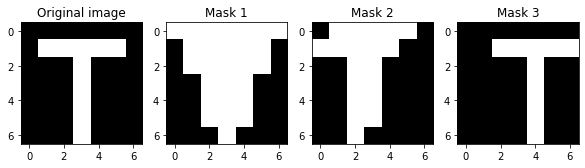

In [ ]:
mask_1 = np.array([[1, 1, 1],
                   [0, 1, 0],
                   [0, 1, 0]])
mask_2 = np.array([[0, 1],
                   [1, 0]])
mask_3 = np.array([[0, 0, 1]])

t = np.array([[0, 0 , 0 , 0, 0, 0, 0],
              [0, 1 , 1 , 1, 1, 1, 0],
              [0, 0 , 0 , 1, 0, 0, 0],
              [0, 0 , 0 , 1, 0, 0, 0],
              [0, 0 , 0 , 1, 0, 0, 0],
              [0, 0 , 0 , 1, 0, 0, 0],
              [0, 0 , 0 , 1, 0, 0, 0]])

result_1 = binary_dilation(t, mask_1)
result_2 = binary_dilation(t, mask_2)
result_3 = binary_dilation(t, mask_3)

fig, axs = plt.subplots(1, 4, figsize=(10,10))
axs[0].imshow(t, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(result_1, cmap='gray')
axs[1].set_title('Mask 1')
axs[2].imshow(result_2, cmap='gray')
axs[2].set_title('Mask 2')
axs[3].imshow(result_3, cmap='gray')
axs[3].set_title('Mask 3')

Text(0.5, 1.0, 'Mask 3')

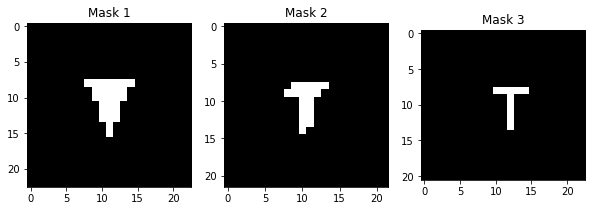

In [ ]:
mask_1 = np.pad(mask_1, ((10,10),(10,10)), constant_values=(0,0))
mask_2 = np.pad(mask_2, ((10,10),(10,10)), constant_values=(0,0))
mask_3 = np.pad(mask_3, ((10,10),(10,10)), constant_values=(0,0))

result_1 = binary_dilation(mask_1, t)
result_2 = binary_dilation(mask_2, t)
result_3 = binary_dilation(mask_3, t)

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(result_1, cmap='gray')
axs[0].set_title('Mask 1')
axs[1].imshow(result_2, cmap='gray')
axs[1].set_title('Mask 2')
axs[2].imshow(result_3, cmap='gray')
axs[2].set_title('Mask 3')